Estimated Parameters:
 p = 0.0094
 q = 0.6686
 M = 5825


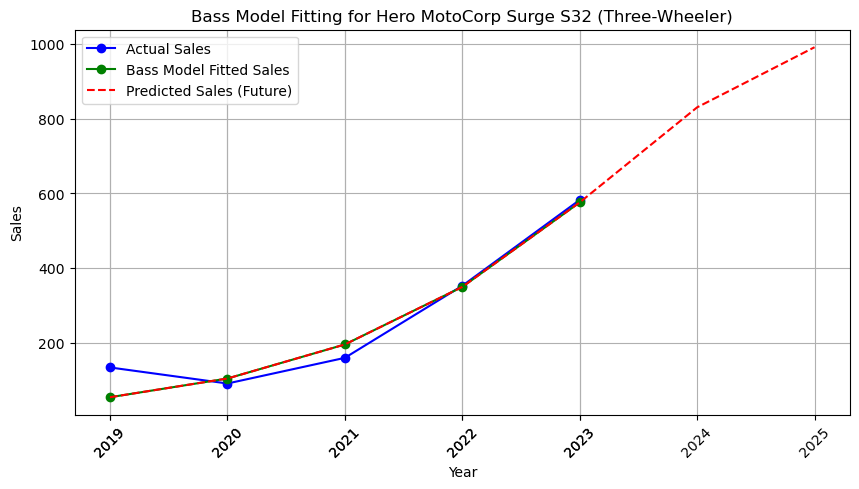

In [1]:
import numpy as np
import pandas as pd
from utility_functions import load_ev_data, fit_bass_model, predict_future_sales, plot_bass_model, bass_model

file_path = "../data/EV_Sales_India.xlsx"

df = load_ev_data(file_path)

df["Year"] = df["Year"].astype(int)

df = df[df["Year"] >= 2019]  

years = df["Year"].values  # Keep years as integers
sales = df['Three-wheeler'].values

params, base_year = fit_bass_model(years, sales)

p_est, q_est, M_est = params
print(f"Estimated Parameters:\n p = {p_est:.4f}\n q = {q_est:.4f}\n M = {M_est:.0f}")

years_numeric = years - base_year  # Keep raw differences
fitted_sales = [bass_model(t, p_est, q_est, M_est) for t in years_numeric]  

future_years, future_sales = predict_future_sales(params, base_year, end_year=2025)

plot_bass_model(years, sales, fitted_sales, future_years, future_sales)